In [5]:
import pandas as pd

In [6]:
from scipy.stats import chi2_contingency
import seaborn as sns
import numpy as np

In [7]:
import numpy as np
import seaborn as sns
from datascience import *
%matplotlib inline

In [8]:
table = pd.read_excel('hxb2f.meth_cleaned_genes.xlsx')

table


,Reference_sequence_name,Start_position,End_position_excl,Modification_type,Score,Strand,Read_coverage_at_reference,Percentage_of_mod_bases,Reading_frame_1,Reading_frame_2,Reading_frame_3,in_paper,tat_reading,rev_reading,Unnamed: 14
0,HXB2F,2,3,5hmC,35,-,28,100.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
1,HXB2F,6,7,5hmC,32,-,31,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
2,HXB2F,23,24,5hmC,814,+,108,3.41,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
3,HXB2F,24,25,5hmC,857,-,35,23.33,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
4,HXB2F,37,38,5hmC,9,+,108,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,HXB2F,9476,9477,5hmC,500,-,4,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
451,HXB2F,9491,9492,5hmC,857,+,7,16.67,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
452,HXB2F,9492,9493,5hmC,1000,-,3,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
453,HXB2F,9648,9649,5hmC,857,+,7,33.33,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN


In [9]:
is_mod = table['Percentage_of_mod_bases']>50
is_mod

0       True
1      False
2      False
3      False
4      False
       ...  
450    False
451    False
452    False
453    False
454    False
Name: Percentage_of_mod_bases, Length: 455, dtype: bool

In [10]:
is_LTR_5 = table['Reading_frame_1'] == 'LTR_5'
is_LTR_5 

0       True
1       True
2       True
3       True
4       True
       ...  
450    False
451    False
452    False
453    False
454    False
Name: Reading_frame_1, Length: 455, dtype: bool

In [11]:
LTR_5_crosstab = pd.crosstab (is_LTR_5, is_mod)
LTR_5_crosstab

Percentage_of_mod_bases,False,True
Reading_frame_1,,
False,336,32
True,80,7


In [12]:
from scipy.stats import chi2_contingency

In [13]:
delta, p_value, dof, c_expected = chi2_contingency (LTR_5_crosstab)

In [14]:

print(f'There were {dof} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected}')

print(f'There was a difference of {delta} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 336.45714286   31.54285714]
 [  79.54285714    7.45714286]]
There was a difference of 0.0 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=1.0.


In [15]:
is_gag = table['Reading_frame_1'] == 'gag'
is_gag 

0      False
1      False
2      False
3      False
4      False
       ...  
450    False
451    False
452    False
453    False
454    False
Name: Reading_frame_1, Length: 455, dtype: bool

In [16]:
gag_crosstab = pd.crosstab (is_gag, is_mod)
gag_crosstab

Percentage_of_mod_bases,False,True
Reading_frame_1,,
False,347,32
True,69,7


In [17]:
delta_gag, p_value_gag, dof_gag, c_expected_gag = chi2_contingency (gag_crosstab)

In [18]:
print(f'There were {dof_gag} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_gag}')

print(f'There was a difference of {delta_gag} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_gag}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 346.51428571   32.48571429]
 [  69.48571429    6.51428571]]
There was a difference of 0.0 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=1.0.


In [19]:
is_pol = table['Reading_frame_3' ] == 'pol'

is_pol

0      False
1      False
2      False
3      False
4      False
       ...  
450    False
451    False
452    False
453    False
454    False
Name: Reading_frame_3, Length: 455, dtype: bool

In [20]:
pd.crosstab (is_pol, is_mod)

Percentage_of_mod_bases,False,True
Reading_frame_3,,
False,366,29
True,50,10


In [21]:
delta_pol, p_value_pol, dof_pol, c_expected_pol = chi2_contingency (pd.crosstab (is_gag, is_mod))

In [22]:
print(f'There were {dof_pol} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_pol}')

print(f'There was a difference of {delta_pol} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_pol}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 346.51428571   32.48571429]
 [  69.48571429    6.51428571]]
There was a difference of 0.0 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=1.0.


In [23]:
is_vif = table['Reading_frame_1'] == 'vif'
is_vif

0      False
1      False
2      False
3      False
4      False
       ...  
450    False
451    False
452    False
453    False
454    False
Name: Reading_frame_1, Length: 455, dtype: bool

In [24]:
vif_crosstab = pd.crosstab (is_vif, is_mod)
vif_crosstab

Percentage_of_mod_bases,False,True
Reading_frame_1,,
False,409,37
True,7,2


In [25]:
delta_vif, p_value_vif, dof_vif, c_expected_vif = chi2_contingency (vif_crosstab)

In [26]:
print(f'There were {dof_vif} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_vif}')

print(f'There was a difference of {delta_vif} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_vif}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 407.77142857   38.22857143]
 [   8.22857143    0.77142857]]
There was a difference of 0.767791246263079 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=0.3809012164487693.


In [27]:
is_vpr = table['Reading_frame_3'] == 'vpr'
is_vpr

0      False
1      False
2      False
3      False
4      False
       ...  
450    False
451    False
452    False
453    False
454    False
Name: Reading_frame_3, Length: 455, dtype: bool

In [28]:
table

,Reference_sequence_name,Start_position,End_position_excl,Modification_type,Score,Strand,Read_coverage_at_reference,Percentage_of_mod_bases,Reading_frame_1,Reading_frame_2,Reading_frame_3,in_paper,tat_reading,rev_reading,Unnamed: 14
0,HXB2F,2,3,5hmC,35,-,28,100.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
1,HXB2F,6,7,5hmC,32,-,31,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
2,HXB2F,23,24,5hmC,814,+,108,3.41,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
3,HXB2F,24,25,5hmC,857,-,35,23.33,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
4,HXB2F,37,38,5hmC,9,+,108,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,HXB2F,9476,9477,5hmC,500,-,4,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
451,HXB2F,9491,9492,5hmC,857,+,7,16.67,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
452,HXB2F,9492,9493,5hmC,1000,-,3,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
453,HXB2F,9648,9649,5hmC,857,+,7,33.33,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN


In [29]:
vpr_crosstab = pd.crosstab (is_vpr, is_mod)

In [30]:
delta_vpr, p_value_vpr, dof_vpr, c_expected_vpr = chi2_contingency (vpr_crosstab)

In [31]:
print(f'There were {dof_vpr} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_vpr}')

print(f'There was a difference of {delta_vpr} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_vpr}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 406.85714286   38.14285714]
 [   9.14285714    0.85714286]]
There was a difference of 0.1664179541198501 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=0.6833151061980818.


In [32]:
is_tat = table['tat_reading'] == 'tat'
is_tat

0      False
1      False
2      False
3      False
4      False
       ...  
450    False
451    False
452    False
453    False
454    False
Name: tat_reading, Length: 455, dtype: bool

In [33]:
tat_crosstab = pd.crosstab (is_tat, is_mod)
tat_crosstab


Percentage_of_mod_bases,False,True
tat_reading,,
False,392,38
True,24,1


In [34]:
delta_tat, p_value_tat, dof_tat, c_expected_tat = chi2_contingency (tat_crosstab)

In [35]:
print(f'There were {dof_tat} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_tat}')

print(f'There was a difference of {delta_tat} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_tat}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 393.14285714   36.85714286]
 [  22.85714286    2.14285714]]
There was a difference of 0.22320130813953498 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=0.6366114337797564.


In [36]:
is_rev = table['rev_reading' ] == 'rev'
is_rev

0      False
1      False
2      False
3      False
4      False
       ...  
450    False
451    False
452    False
453    False
454    False
Name: rev_reading, Length: 455, dtype: bool

In [37]:
rev_crosstab = pd.crosstab (is_rev, is_mod)

In [38]:
delta_rev, p_value_rev, dof_rev, c_expected_rev = chi2_contingency (rev_crosstab)

In [39]:
print(f'There were {dof_rev} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_rev}')

print(f'There was a difference of {delta_rev} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_rev}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 409.6   38.4]
 [   6.4    0.6]]
There was a difference of 0.0 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=1.0.


In [40]:
is_env = table['Reading_frame_3'] == 'env'
is_env

0      False
1      False
2      False
3      False
4      False
       ...  
450    False
451    False
452    False
453    False
454    False
Name: Reading_frame_3, Length: 455, dtype: bool

In [41]:
env_crosstab = pd.crosstab (is_env, is_mod)
env_crosstab

Percentage_of_mod_bases,False,True
Reading_frame_3,,
False,320,34
True,96,5


In [42]:
delta_env, p_value_env, dof_env, c_expected_env = chi2_contingency (env_crosstab)

In [43]:
print(f'There were {dof_env} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_env}')

print(f'There was a difference of {delta_env} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_env}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 323.65714286   30.34285714]
 [  92.34285714    8.65714286]]
There was a difference of 1.6186020416130593 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=0.2032868231345772.


In [44]:
is_LTR_3 = table['Reading_frame_2'] == 'LTR_3'
is_LTR_3

0      False
1      False
2      False
3      False
4      False
       ...  
450     True
451     True
452     True
453     True
454    False
Name: Reading_frame_2, Length: 455, dtype: bool

In [45]:
LTR_3_crosstab = pd.crosstab (is_LTR_3, is_mod)

In [46]:
delta_LTR_3, p_value_LTR_3, dof_LTR_3, c_expected_LTR_3 = chi2_contingency (LTR_3_crosstab )

In [47]:
print(f'There were {dof_LTR_3} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_LTR_3}')

print(f'There was a difference of {delta_LTR_3} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_LTR_3}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 391.31428571   36.68571429]
 [  24.68571429    2.31428571]]
There was a difference of 0.0 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=1.0.


In [48]:
is_tat_paper = table['in_paper'] == 'tat_CGI'
is_tat_paper

0      False
1      False
2      False
3      False
4      False
       ...  
450    False
451    False
452    False
453    False
454    False
Name: in_paper, Length: 455, dtype: bool

In [49]:
tat_paper_crosstab = pd.crosstab (is_tat_paper, is_mod)
tat_paper_crosstab 

Percentage_of_mod_bases,False,True
in_paper,,
False,385,39
True,31,0


In [50]:
delta_is_tat_paper, p_value_is_tat_paper, dof_is_tat_paper, c_expected_is_tat_paper = chi2_contingency (tat_paper_crosstab)

In [51]:
print(f'There were {dof_is_tat_paper} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_is_tat_paper}')

print(f'There was a difference of {delta_is_tat_paper} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_is_tat_paper}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 387.65714286   36.34285714]
 [  28.34285714    2.65714286]]
There was a difference of 2.0554481052825118 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=0.15166263006489156.


In [52]:
is_gag_paper = table['in_paper'] == 'gag_leader'
is_gag_paper

0      False
1      False
2      False
3      False
4      False
       ...  
450    False
451    False
452    False
453    False
454    False
Name: in_paper, Length: 455, dtype: bool

In [53]:
gag_paper_crosstab = pd.crosstab (is_gag_paper, is_mod)
gag_paper_crosstab 

Percentage_of_mod_bases,False,True
in_paper,,
False,364,36
True,52,3


In [54]:
delta_is_gag_paper, p_value_is_gag_paper, dof_is_gag_paper, c_expected_is_gag_paper = chi2_contingency (gag_paper_crosstab)

In [55]:
print(f'There were {dof_is_gag_paper} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_is_gag_paper}')

print(f'There was a difference of {delta_is_gag_paper} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_is_gag_paper}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 365.71428571   34.28571429]
 [  50.28571429    4.71428571]]
There was a difference of 0.38913056344696995 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=0.5327567688217003.


In [56]:
is_LTR_CGI_paper = table['in_paper'] == 'LTR_CGI'
is_LTR_CGI_paper

0      False
1      False
2      False
3      False
4      False
       ...  
450    False
451    False
452    False
453    False
454    False
Name: in_paper, Length: 455, dtype: bool

In [57]:
is_LTR_CGI_paper_crosstab = pd.crosstab (is_LTR_CGI_paper, is_mod)
is_LTR_CGI_paper_crosstab 

Percentage_of_mod_bases,False,True
in_paper,,
False,383,38
True,33,1


In [58]:
delta_is_LTR_CGI_paper, p_value_is_LTR_CGI_paper, dof_is_LTR_CGI_paper, c_expected_is_LTR_CGI_paper = chi2_contingency (is_LTR_CGI_paper_crosstab )

In [59]:
print(f'There were {dof_is_LTR_CGI_paper} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_is_LTR_CGI_paper}')

print(f'There was a difference of {delta_is_LTR_CGI_paper} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_is_LTR_CGI_paper}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 384.91428571   36.08571429]
 [  31.08571429    2.91428571]]
There was a difference of 0.8113150805155788 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=0.367731732187215.


In [60]:
table


,Reference_sequence_name,Start_position,End_position_excl,Modification_type,Score,Strand,Read_coverage_at_reference,Percentage_of_mod_bases,Reading_frame_1,Reading_frame_2,Reading_frame_3,in_paper,tat_reading,rev_reading,Unnamed: 14
0,HXB2F,2,3,5hmC,35,-,28,100.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
1,HXB2F,6,7,5hmC,32,-,31,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
2,HXB2F,23,24,5hmC,814,+,108,3.41,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
3,HXB2F,24,25,5hmC,857,-,35,23.33,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
4,HXB2F,37,38,5hmC,9,+,108,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,HXB2F,9476,9477,5hmC,500,-,4,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
451,HXB2F,9491,9492,5hmC,857,+,7,16.67,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
452,HXB2F,9492,9493,5hmC,1000,-,3,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
453,HXB2F,9648,9649,5hmC,857,+,7,33.33,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN


In [61]:
is_score = table['Score']>500
is_score

0      False
1      False
2       True
3       True
4      False
       ...  
450    False
451     True
452     True
453     True
454    False
Name: Score, Length: 455, dtype: bool

In [62]:
is_LTR_CGI_paper_crosstab_score = pd.crosstab (is_LTR_CGI_paper, is_score)
is_LTR_CGI_paper_crosstab_score

Score,False,True
in_paper,,
False,250,171
True,17,17


In [63]:
delta_is_LTR_CGI_paper_score, p_value_is_LTR_CGI_paper_score, dof_is_LTR_CGI_paper_score, c_expected_is_LTR_CGI_paper_score = chi2_contingency (is_LTR_CGI_paper_crosstab_score)

In [64]:
print(f'There were {dof_is_LTR_CGI_paper} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_is_LTR_CGI_paper}')

print(f'There was a difference of {delta_is_LTR_CGI_paper} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_is_LTR_CGI_paper}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 384.91428571   36.08571429]
 [  31.08571429    2.91428571]]
There was a difference of 0.8113150805155788 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=0.367731732187215.


In [74]:
table


,Reference_sequence_name,Start_position,End_position_excl,Modification_type,Score,Strand,Read_coverage_at_reference,Percentage_of_mod_bases,Reading_frame_1,Reading_frame_2,Reading_frame_3,in_paper,tat_reading,rev_reading,Unnamed: 14
0,HXB2F,2,3,5hmC,35,-,28,100.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
1,HXB2F,6,7,5hmC,32,-,31,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
2,HXB2F,23,24,5hmC,814,+,108,3.41,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
3,HXB2F,24,25,5hmC,857,-,35,23.33,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
4,HXB2F,37,38,5hmC,9,+,108,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,HXB2F,9476,9477,5hmC,500,-,4,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
451,HXB2F,9491,9492,5hmC,857,+,7,16.67,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
452,HXB2F,9492,9493,5hmC,1000,-,3,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
453,HXB2F,9648,9649,5hmC,857,+,7,33.33,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Start_position', ylabel='Read_coverage_at_reference'>

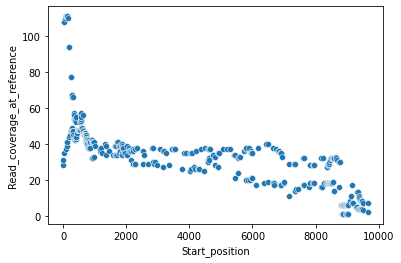

In [80]:
sns.scatterplot(data=table, x='Start_position', y='Read_coverage_at_reference')

<AxesSubplot:xlabel='Start_position', ylabel='Percentage_of_mod_bases'>

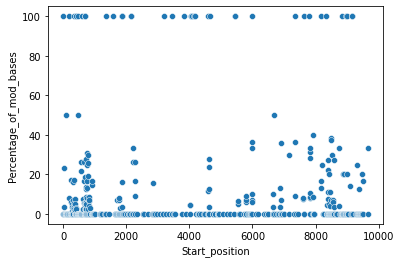

In [76]:
sns.scatterplot(data=table, x='Start_position', y='Percentage_of_mod_bases')

In [77]:
mod_score_bases = table.groupby('Start_position')['Percentage_of_mod_bases'].first()/100
mod_score_bases 

Start_position
2       1.0000
6       0.0000
23      0.0341
24      0.2333
37      0.0000
         ...  
9476    0.0000
9491    0.1667
9492    0.0000
9648    0.3333
9649    0.0000
Name: Percentage_of_mod_bases, Length: 455, dtype: float64

Text(0, 0.5, 'weighted sum')

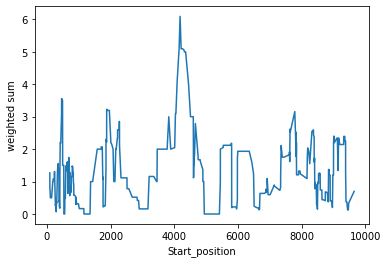

In [82]:
ax = mod_score_bases.rolling(10).sum().plot()
ax.set_ylabel('weighted sum')

Text(0, 0.5, 'weighted sum')

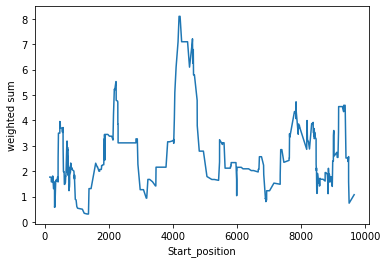

In [83]:
ax = mod_score_bases.rolling(20).sum().plot()
ax.set_ylabel('weighted sum')

Text(0, 0.5, 'weighted sum')

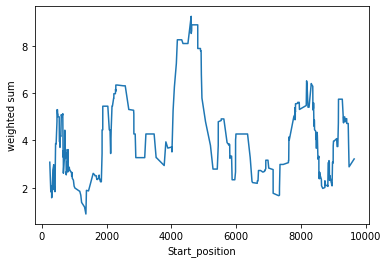

In [84]:
ax = mod_score_bases.rolling(30).sum().plot()
ax.set_ylabel('weighted sum')

Text(0, 0.5, 'sum(%mod_bases)')

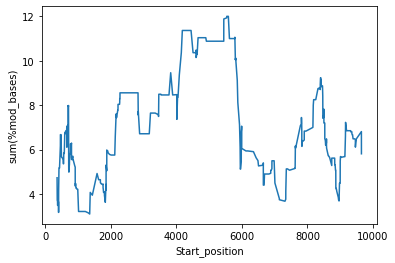

In [88]:
ax = mod_score_bases.rolling(50).sum().plot()
ax.set_ylabel('sum(%mod_bases)')

Text(0, 0.5, 'weighted sum')

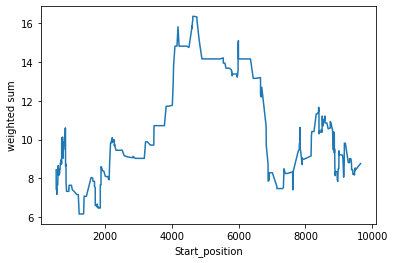

In [86]:
ax = mod_score_bases.rolling(75).sum().plot()
ax.set_ylabel('weighted sum')

Text(0, 0.5, 'weighted sum')

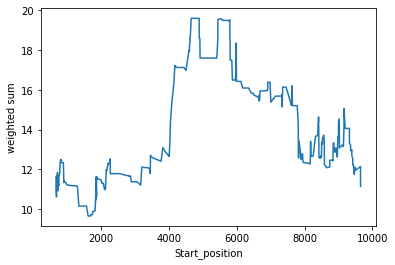

In [87]:
ax = mod_score_bases.rolling(100).sum().plot()
ax.set_ylabel('weighted sum')

In [79]:
# I did this by hand, took a while.

# positions 2, 95, 186, 332, 410, 420, 463, 597 were found to be methylated in 50% of each Read_coverage_at_reference from the table. 
total_bases_LTR_five = 634
total_mod_LTR_five = 88
total_unmod_LTR_five = 546
mod_LTR_five_above_cut_off = 7


# positions 1374, 1582, 1854, 1858, 1879, 2138, 2164 were found to be methylated in >50% of each Read_coverage_at_reference from the table.
total_bases_gag = 1523
total_mod_gag = 75
total_unmod_gag = 1448
mod_gag_above_cut_off = 7


# positions 3212, 3466, 3829, 4038, 4052, 4092, 4153, 4184, 4598, 4664 were found to be methylated >50% of each Read_coverage_at_reference from the table.
total_bases_pol = 2738
total_mod_pol = 59
total_unmod_pol = 2679
mod_pol_above_cut_off = 10

# positions 5448, 5449 were found to be methylated >50% of each Read_coverage_at_reference from the table.
total_bases_vif = 578
total_mod_vif = 8
total_unmod_vif = 570
mod_vif_above_cut_off = 2

# No positions were found to be methylated in >50% of each Read_coverage_at_reference from the table.
total_base_vpr = 280
total_mod_vpr = 10
total_unmod_vpr  = 270
mod_vpr_above_cut_off = 0

# positions 5984 was found to be methylated >50% of each Read_coverage_at_reference from the table.
total_bases_tat = 301
total_mod_tat = 25
total_unmod_tat = 276
mod_tat_above_cut_off = 1

# positions 5984 was found to be methylated >50% of each Read_coverage_at_reference from the table.
total_bases_rev = 349
total_mod_rev = 39
total_unmod_rev = 310
mod_rev_above_cut_off = 1

# positions 7357, 7633, 7785, 8179, 8323,  were found to be methylated >50% of each Read_coverage_at_reference from the table.
total_bases_env = 2570
total_mod_env = 100
total_unmod_env = 2470
mod_env_above_cut_off = 5

# positions 8846, 8980, 9002, 9161, 9165 were found to be methylated >50% of each Read_coverage_at_reference from the table.
total_bases_nef = 617
total_mod_nef = 43
total_unmod_nef = 617
mod_nef_above_cut_off = 5

# positions 9161, 9165 were found to be methylated >50% of each Read_coverage_at_reference from the table.
total_bases_LTR_three = 633
total_mod_LTR_three = 27
total_unmod_LTR_three = 606
mod_LTR_three_above_cut_off = 2

# positions 700, 680 were found to be methylated >50% of each Read_coverage_at_reference from the table.
total_mod_bases_no_gene = 46
total_unmod_no_gene = 123
mod_no_gene_above_cut_off = 2

